In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pprint import pprint

from functools import partial

import numpy as np
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.pca as pca
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth
import mlgrad.inventory as inventory
from mlgrad.af import averaging_function
import mlgrad.avragg as avragg

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import despike, utils
import irsa.widgets as widgets
import irsa.spectra as spectra
import irsa.io as io

import scipy.special as special

import copy

import ipywidgets
from IPython.display import display

import sys
print(sys.version)

# %matplotlib widget
# plt.ioff()

3.13.2 (main, Mar 13 2025, 14:29:07) [GCC 14.2.0]


In [2]:
d2 = spectra.SpectraCollection()
d2.load("/home/intellimath/work/spectra/spectra_36_95_B_C", "ys-bs-2")
for key in d2:
    sp = d2[key]
    print(sp.key)

20220303__B__less100__1_6_SE_H2O(HPLC)
20220304__C__less100__1_7_SE_H2O(HPLC)
20250221_SA_95_R_less100__1_2_SE_H2O(HPLC)
20220303__C__less100__1_6_SE_H2O(HPLC)
20220304__B__less100__1_7_SE_H2O(HPLC)
20250221_SA_36_S_less100__1_2_SE_H2O(HPLC)


In [3]:
d2_keys = list(sorted(d2.keys()))
sel_i = 0
sel = ipywidgets.Dropdown(options=d2_keys,  description="Experiment:", rows=len(d2_keys)+1)
sel.layout.width="50%"

In [4]:
# @ipywidgets.interact(key=sel)
# def plot_spectra_for_key(key):
#     entry = d2[key]
#     entry.plot_spectra()

In [5]:
# for key in d2:
#     entry = d2[key]
#     entry.smooth(tau=10.0, func2=funcs.RectExp(w=10.0, p=1.0).evaluate_array)

In [6]:
# @ipywidgets.interact(key=sel)
# def select_windows_for_key(key):
#     entry = d2[key]
#     entry.windows = [(1560.0,2690.0), (3010.0,3790.0)]
#     entry.smooth_by_windows(windows=entry.windows, tau=100)
#     # entry.select_windows()

In [7]:
# for key in d2:
#     entry = d2[key]
#     entry.allign_bottom()
#     entry.scale_by_max(scale=10.0)

In [8]:
def dist(S, X, c=0):
    return np.sqrt([((S@x)@x) for x in (X-c)])

for i, key in enumerate(d2):
    entry = d2[key]
    Ys = entry.y
    for ys in Ys:
        ys[:] = ys / ys.mean()


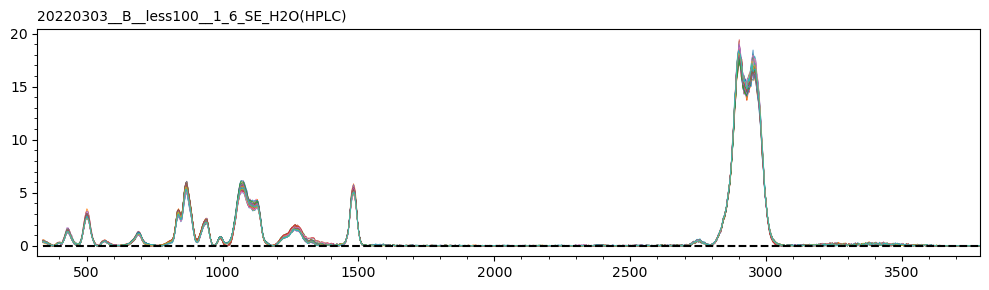

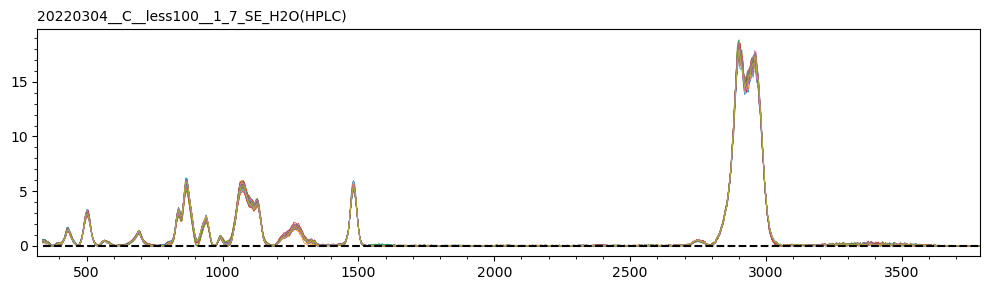

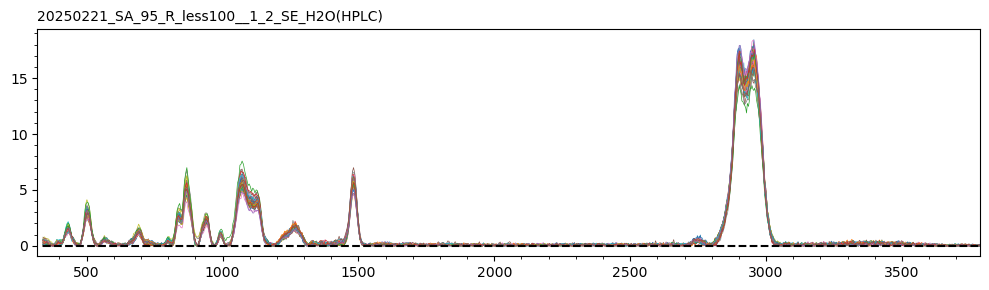

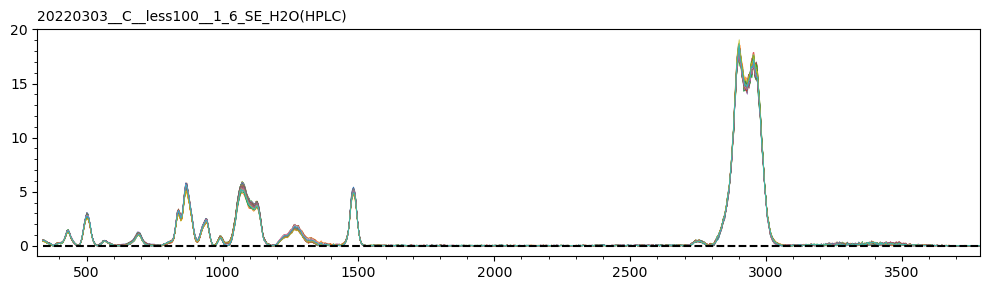

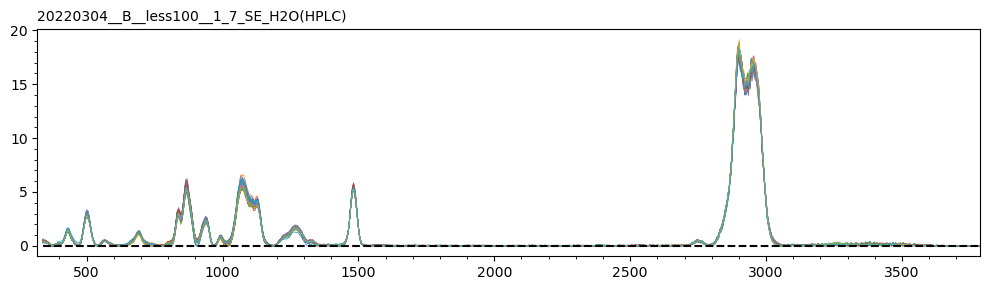

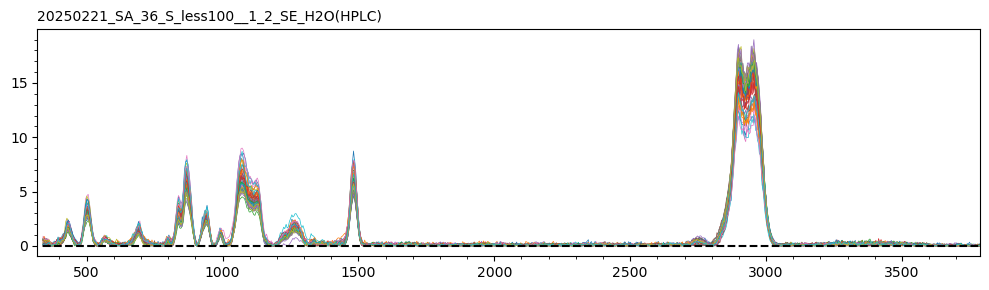

In [9]:
for i, key in enumerate(d2):
    entry = d2[key]
    plt.figure(figsize=(10,3))
    plt.title(key, loc="left", fontdict={"size":10})
    xs = entry.x
    Ys = entry.y
    for ys in Ys:
        plt.plot(xs, ys, linewidth=0.5)
    plt.hlines(0, min(xs), max(xs), colors='k', linestyles='--')
    plt.xlim(min(xs)-20, max(xs))
        
    plt.minorticks_on()
    plt.tight_layout()
    # plt.legend()
    plt.show()


In [10]:
# def func2(E):
#     E_abs = abs(E)
#     return E_abs / np.max(E_abs)

# @ipywidgets.interact(key=sel)
# def plot_spectra_for_key(key):
#     entry = d2[key]
#     entry.select_baselines(tau2=5, bs_scale=4.0, d=2, func2_mode="d",
#                            ww=10, tau_smooth=100, n_iter=100, tol=1.0e-6,
#                            func=funcs.Step(0.01),
#                            # func2=func2,
#                            override_tau2=True
#                           )


In [11]:
# for key in d2:
#     entry = d2[key]
    # entry.ys_bs = entry.y - entry.bs    
#     # entry.subtract_selected_baselines()

In [12]:
# for i, key in enumerate(d2):
#     entry = d2[key]
#     entry.replace_spectra_with_corrected()

outliers: 50
outliers: 23
36: err=0.62
95: err=0.21


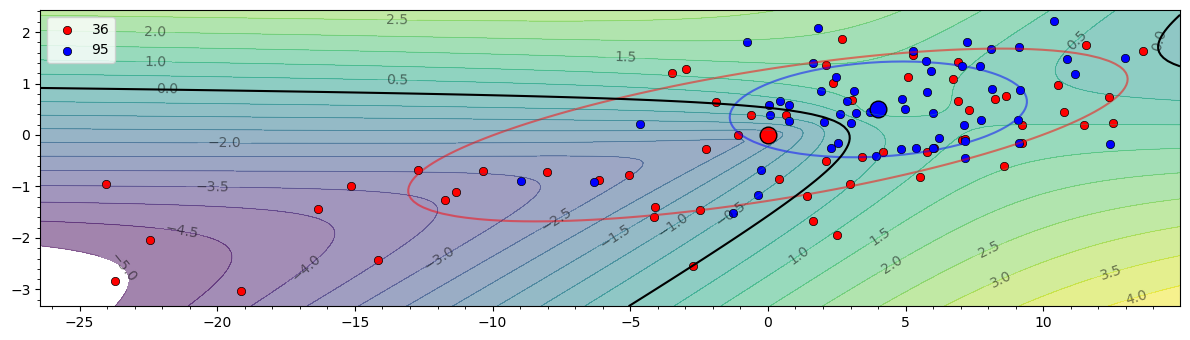

outliers: 50
outliers: 15
36: err=0.47
B: err=0.04


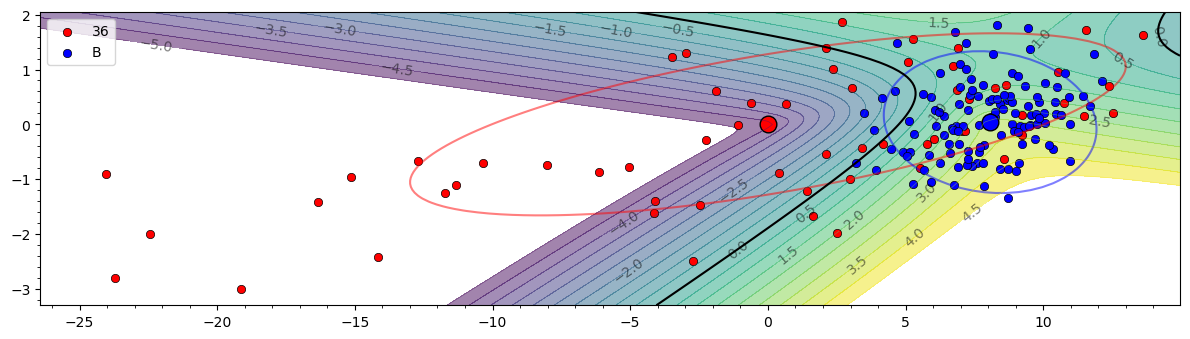

outliers: 33
outliers: 1
95: err=0.21
C: err=0.01


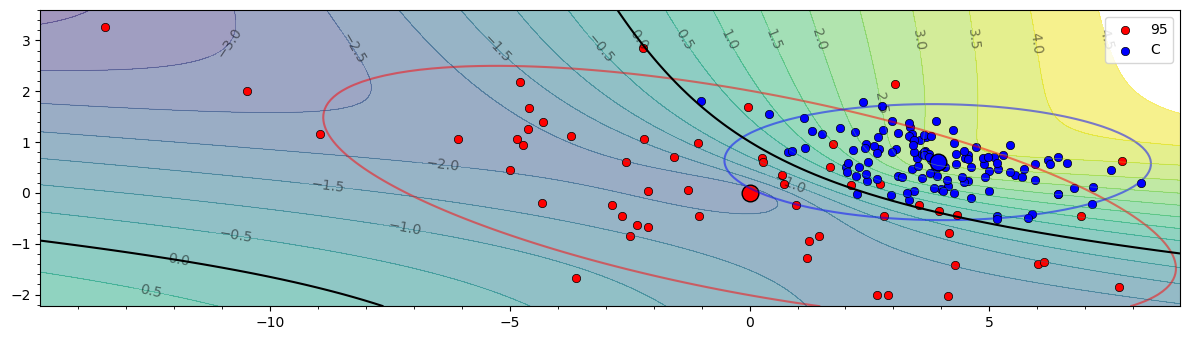

outliers: 42
outliers: 2
B: err=0.33
C: err=0.55


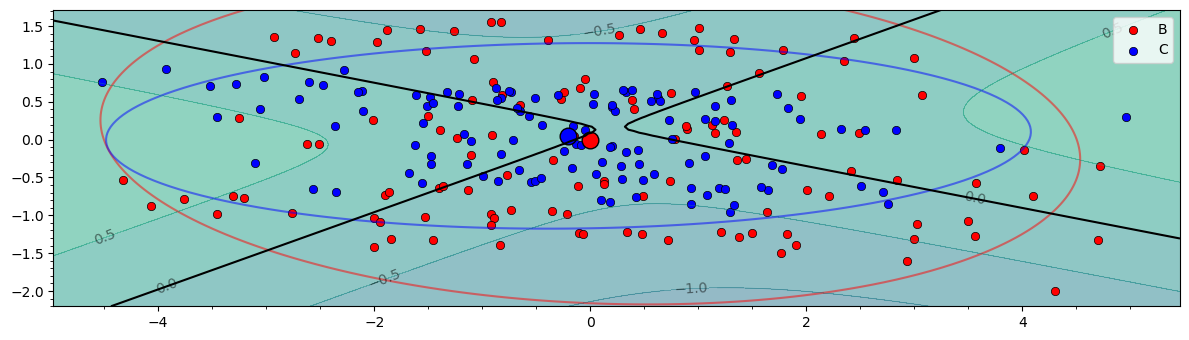

In [14]:
from irsa.analytics.pca import pca_compare_2d, pca_compare_symmetrical_2d, pca_robust_compare_2d

ys36 = np.concatenate(
    tuple(d2.select_y_by_attr_value("штамм_бактерий", "36")), axis=0)
ys95 = np.concatenate(
    tuple(d2.select_y_by_attr_value("штамм_бактерий", "95")), axis=0)
ysB = np.concatenate(
    tuple(d2.select_y_by_attr_value("штамм_бактерий", "B")), axis=0)
ysC = np.concatenate(
    tuple(d2.select_y_by_attr_value("штамм_бактерий", "C")), axis=0)

# print("36:", ys36.shape, "95:", ys95.shape)

pca_compare_2d(ys36, ys95, "36", "95", 0.98)
pca_compare_2d(ys36, ysB, "36", "B", 0.98)
pca_compare_2d(ys95, ysC, "95", "C", 0.98)
pca_compare_2d(ysB, ysC, "B", "C", 0.98)


outliers: 3
outliers: 3
36: err=0.52
95: err=0.23


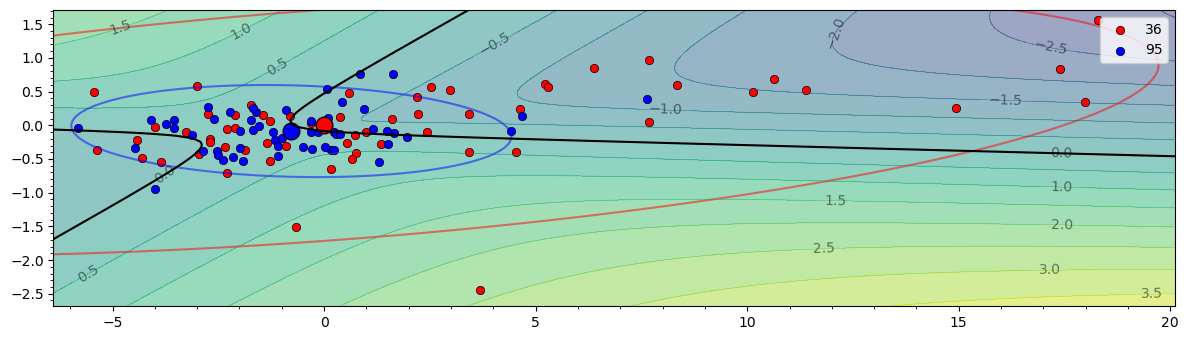

outliers: 3
outliers: 6
36: err=0.33
B: err=0.01


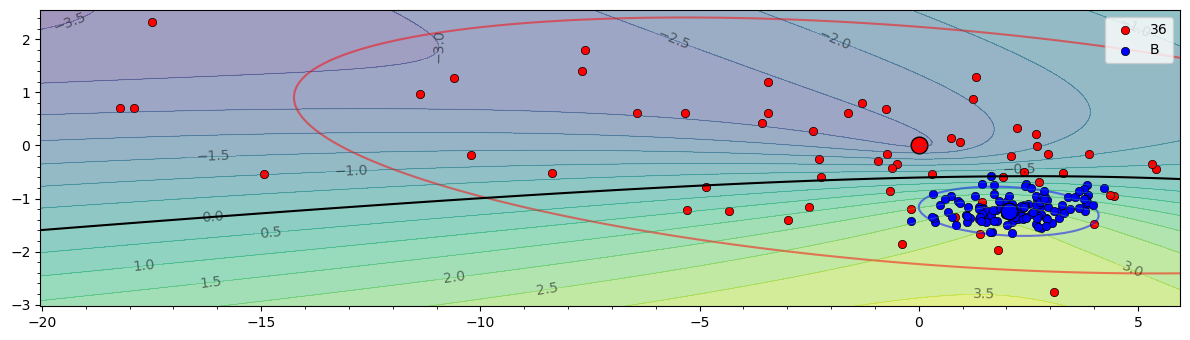

outliers: 3
outliers: 6
95: err=0.38
C: err=0.03


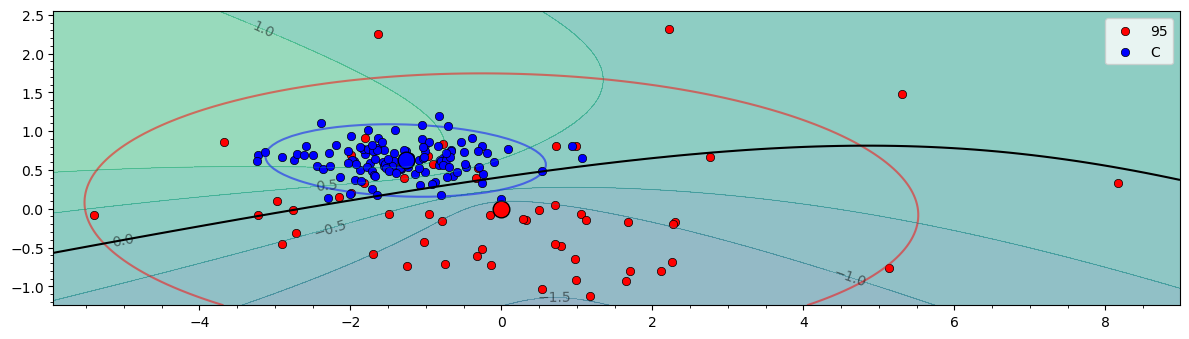

outliers: 6
outliers: 6
B: err=0.30
C: err=0.61


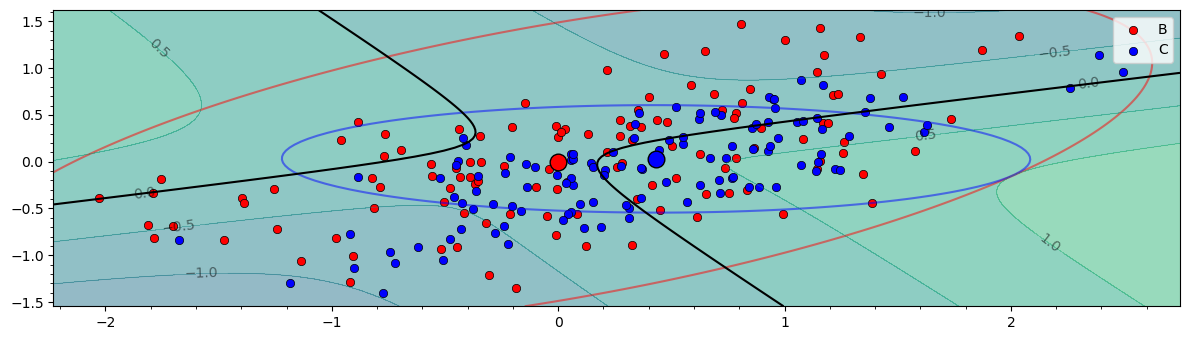

outliers: 6
outliers: 6
C: err=0.24
B: err=0.46


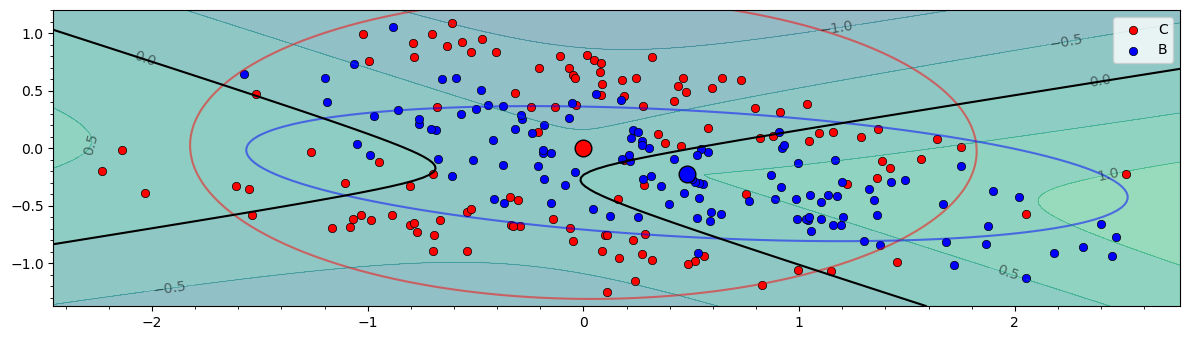

In [13]:
pca_robust_compare_2d(ys36, ys95, "36", "95", 0.95)
pca_robust_compare_2d(ys36, ysB, "36", "B", 0.95)
pca_robust_compare_2d(ys95, ysC, "95", "C", 0.95)
pca_robust_compare_2d(ysB, ysC, "B", "C", 0.95)
pca_robust_compare_2d(ysC, ysB, "C", "B", 0.95)

In [13]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss

import mlgrad.cls as cls
import mlgrad.af as af

zs36 = np.ones(ys36.shape[0], "d")
zs95 = -np.ones(ys95.shape[0], "d")
zsB = np.ones(ysB.shape[0], "d")
zsC = -np.ones(ysC.shape[0], "d")

# print(ys36.shape, zs36.shape)
# print(ys95.shape, zs95.shape)

ys = np.concatenate((ys36,ys95), axis=0)
zs = np.concatenate((zs36,zs95), axis=0)
ys = np.ascontiguousarray(ys, dtype="d")
zs = np.ascontiguousarray(zs, dtype="d")

ysBC = np.concatenate((ysB,ysC), axis=0)
zsBC = np.concatenate((zsB,zsC), axis=0)
ysBC = np.ascontiguousarray(ysBC, dtype="d")
zsBC = np.ascontiguousarray(zsBC, dtype="d")

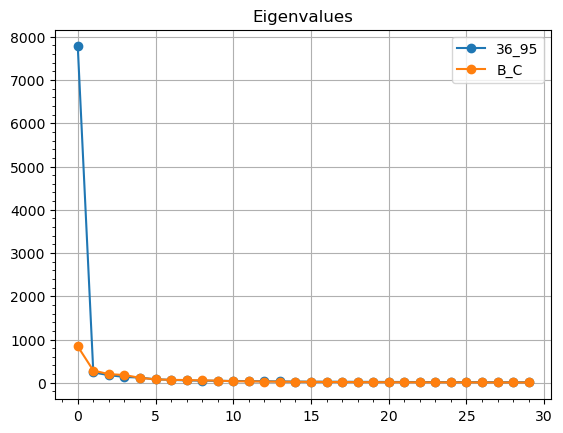

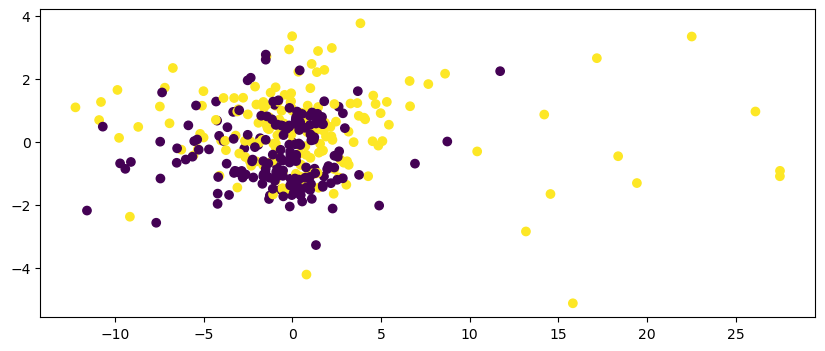

In [14]:
c1, A1, L1 = pca.find_loc_and_pc(ys, n=30)
c2, A2, L2 = pca.find_loc_and_pc(ysBC, n=30)

U1 = (ys - c1) @ A1.T
# S1 = np.linalg.inv(U1.T @ U1)
# S1 /= np.sqrt(np.linalg.det(S1))

U2 = (ysBC - c2) @ A2.T
# S2 = np.linalg.inv(U2.T @ U2)
# S2 /= np.sqrt(np.linalg.det(S2))

plt.title("Eigenvalues")
plt.plot(L1, marker='o', label="36_95")
plt.plot(L2, marker='o', label="B_C")
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.show()

plt.figure(figsize=(10,4))
plt.scatter(U1[:,0], U1[:,1], c=zs)
# plt.show()
# plt.figure(figsize=(10,4))
plt.scatter(U2[:,0], -U2[:,1], c=zsBC)
plt.show()

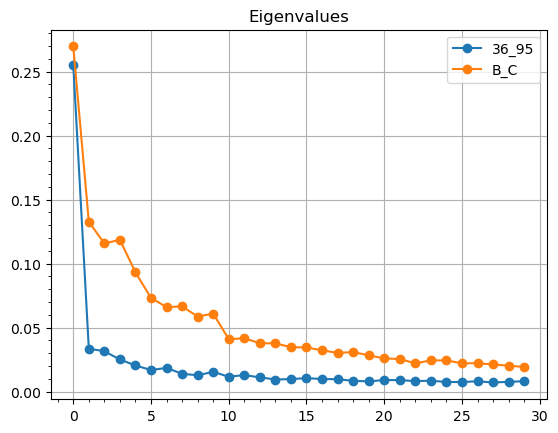

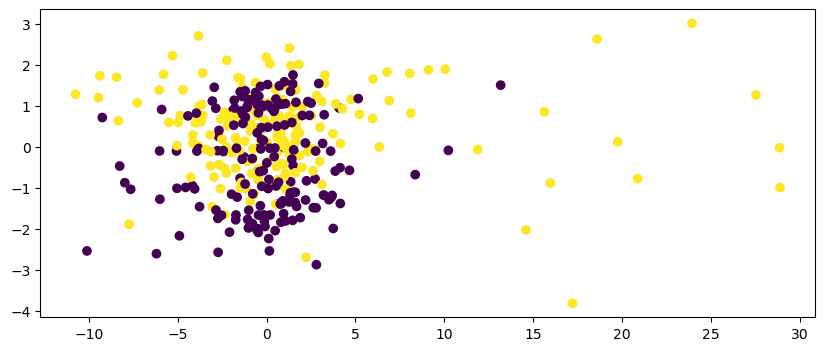

In [15]:
c1, A1, L1 = pca.find_loc_and_pc_ss(ys, n=30)
c2, A2, L2 = pca.find_loc_and_pc_ss(ysBC, n=30)

U1 = (ys - c1) @ A1.T
# S1 = np.linalg.inv(U1.T @ U1)
# S1 /= np.sqrt(np.linalg.det(S1))

U2 = (ysBC - c2) @ A2.T
# S2 = np.linalg.inv(U2.T @ U2)
# S2 /= np.sqrt(np.linalg.det(S2))

plt.title("Eigenvalues")
plt.plot(L1, marker='o', label="36_95")
plt.plot(L2, marker='o', label="B_C")
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.show()

plt.figure(figsize=(10,4))
plt.scatter(U1[:,0], U1[:,1], c=zs)
# plt.show()
# plt.figure(figsize=(10,4))
plt.scatter(U2[:,0], -U2[:,1], c=zsBC)
plt.show()

In [14]:

# print(ys.shape, zs.shape)

# body = models.FFNetworkModel()
# body.add(models.LinearLayer(ys.shape[1], 100))
# body.add(models.ScaleLayer(funcs.Logistic(1.0), 100))
# head = models.LinearModel(100)
# nnmod = models.FFNetworkFuncModel(head, body)
# nnmod.allocate()
# nnmod.init_param()

mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ys.shape[1])
mod.allocate()
mod.init_param()

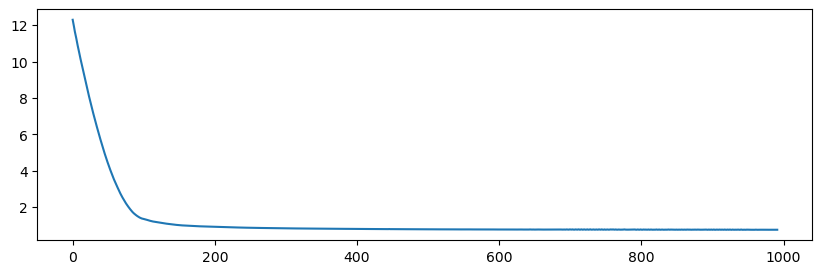

0.9396551724137931


In [15]:
alg = cls.classification_as_regr(ys, zs, mod, regnorm=funcs2.AbsoluteNorm(),
                                 normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                 h=0.005, tau=0.05, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zs, np.sign(mod.evaluate(ys))))

0.0


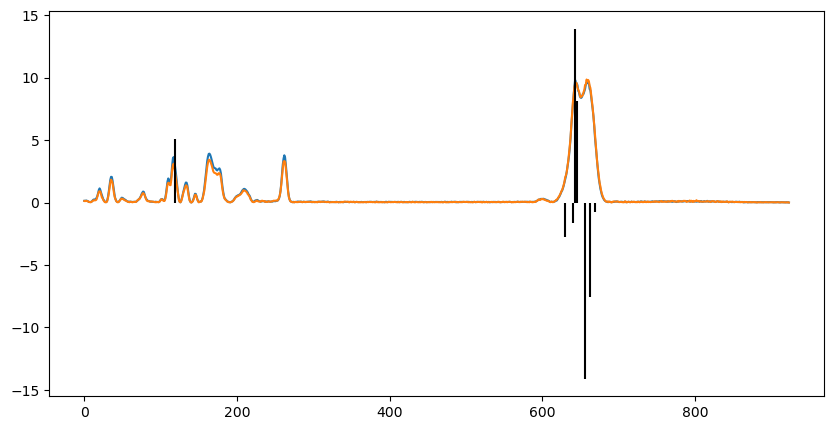

In [16]:
param = np.asarray(mod.param[1:])
print(param[0])
param_p = param.copy()
param_m = param.copy()
param_p[param < 0] = 0
param_m[param > 0] = 0
plt.figure(figsize=(10,5))
plt.plot(ys36.mean(axis=0), label="36")
plt.plot(ys95.mean(axis=0), label="95")
plt.vlines(range(ys.shape[1]), 10*param_m, 10*param_p, color='k')
plt.show()

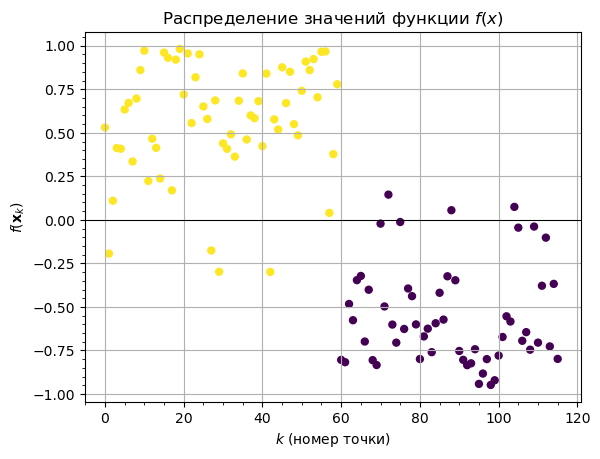

In [17]:
plots.plot_cls_function(mod, ys, zs)

In [18]:
algs = []
mods = []
scores = []
for k in range(44):
    mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ys.shape[1])
    mod.allocate()
    mod.init_param()
    alg = cls.classification_as_regr(ys, zs, mod, regnorm=funcs2.AbsoluteNorm(),
                                     normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                     h=0.005, tau=0.05, n_iter=5000)
    score = accuracy_score(zs, np.sign(mod.evaluate(ys)))
    if score < 0.8:
        continue
    scores.append(score)        
    algs.append(alg)
    mods.append(mod)

print(len(mods))
print(scores)

44
[0.9396551724137931, 0.9051724137931034, 0.9224137931034483, 0.9396551724137931, 0.9224137931034483, 0.9310344827586207, 0.9310344827586207, 0.9137931034482759, 0.9310344827586207, 0.9396551724137931, 0.9137931034482759, 0.9396551724137931, 0.9396551724137931, 0.9396551724137931, 0.9224137931034483, 0.9051724137931034, 0.9396551724137931, 0.9310344827586207, 0.8879310344827587, 0.8793103448275862, 0.9310344827586207, 0.9396551724137931, 0.9396551724137931, 0.9396551724137931, 0.853448275862069, 0.9396551724137931, 0.8706896551724138, 0.8793103448275862, 0.9051724137931034, 0.9224137931034483, 0.9310344827586207, 0.896551724137931, 0.9396551724137931, 0.9310344827586207, 0.9396551724137931, 0.9310344827586207, 0.9224137931034483, 0.9224137931034483, 0.9310344827586207, 0.9310344827586207, 0.9396551724137931, 0.9051724137931034, 0.9310344827586207, 0.9310344827586207]


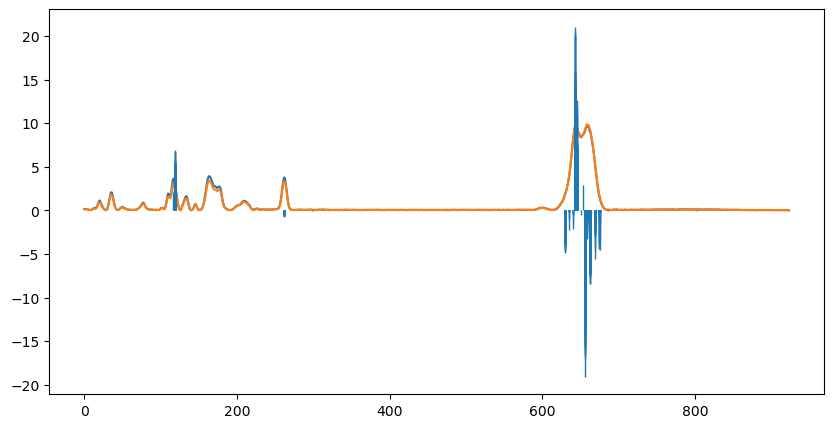

In [19]:
plt.figure(figsize=(10,5))
plt.plot(ys36.mean(axis=0), label="36")
plt.plot(ys95.mean(axis=0), label="95")
for mod in mods:
    param = np.asarray(mod.param[1:])
    # print(param[0])
    param_p = param.copy()
    param_m = param.copy()
    param_p[param < 0] = 0
    param_m[param > 0] = 0
    plt.vlines(range(ys.shape[1]), 10*param_m, 10*param_p, linewidth=1.0)
plt.show()

In [20]:
mod2 = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ysBC.shape[1])
mod2.allocate()
mod2.init_param()

In [21]:
def vote_alg(mods, scores, x):
    y = sum([score*mod.evaluate_one(x) for score, mod in zip(scores, mods)])
    if y > 0:
        y = 1.0
    elif y < 0:
        y = -1.0
    else:
        y = 0.0
    return y

In [22]:
zs_p = [vote_alg(mods, scores, y) for y in ys]
accuracy_score(zs_p, zs)

0.9396551724137931

In [23]:
zsBC_p = [vote_alg(mods, scores, y) for y in ysBC]
accuracy_score(zsBC_p, zsBC)

0.502092050209205

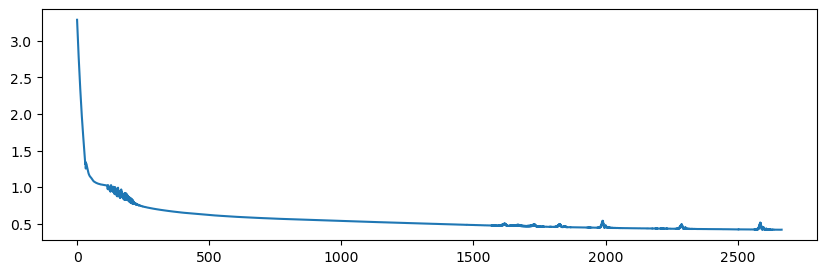

0.9916317991631799


In [24]:
alg2 = cls.classification_as_regr(ysBC, zsBC, mod2, regnorm=funcs2.AbsoluteNorm(),
                                 normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                 h=0.01, tau=0.01, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg2.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zsBC, np.sign(mod2.evaluate(ysBC))))

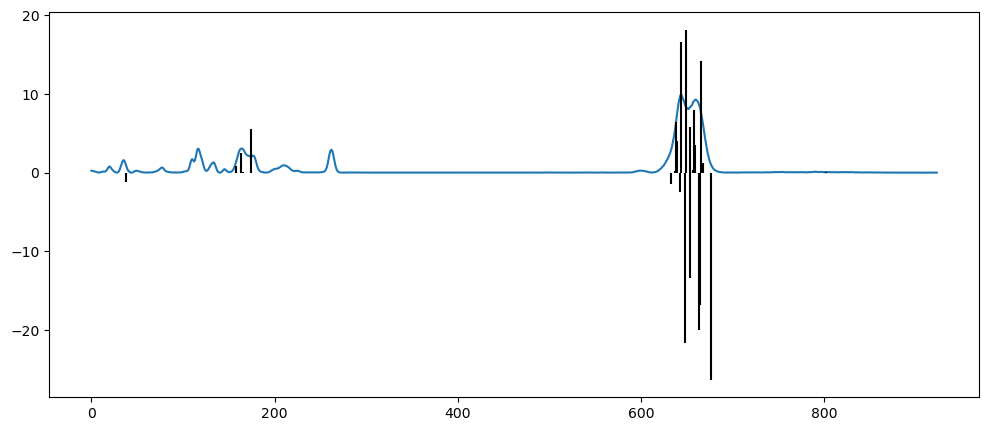

In [25]:
param2 = np.asarray(mod2.param[1:])
param2_p = param2.copy()
param2_m = param2.copy()
param2_p[param2 < 0] = 0
param2_m[param2 > 0] = 0
plt.figure(figsize=(12,5))
plt.plot(ysBC.mean(axis=0))
plt.vlines(range(ysBC.shape[1]), 10*param2_m, 10*param2_p, color='k')
plt.show()

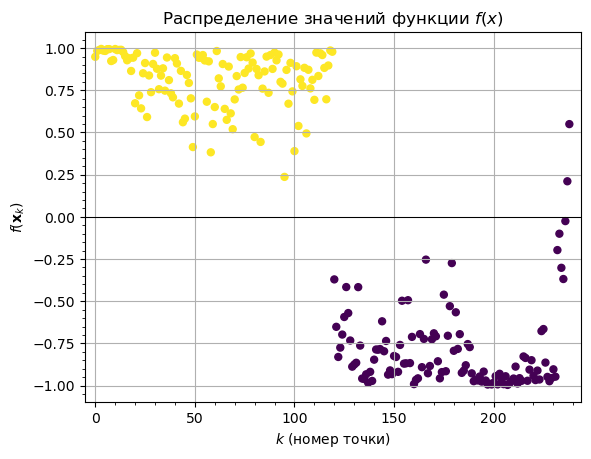

In [26]:
plots.plot_cls_function(mod2, ysBC, zsBC)

In [27]:
print(accuracy_score(zs, np.sign(mod2.evaluate(ys))))

0.6120689655172413


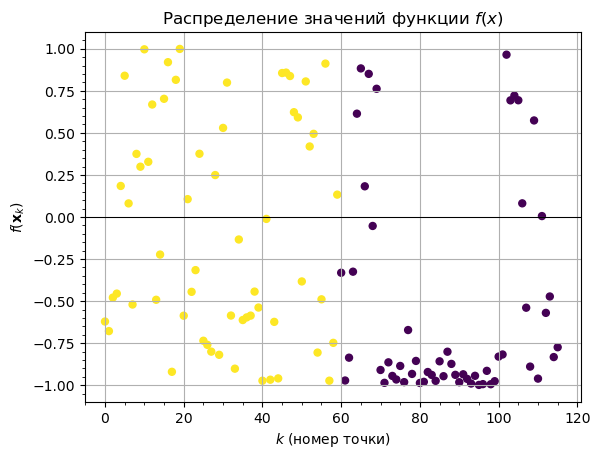

In [28]:
plots.plot_cls_function(mod2, ys, zs)

In [ ]:
# from mlgrad.pca import location, find_pc_all, find_pc_l1_all, find_pc_smoothed_all

# plt.figure(figsize=(10,5))
# for i, key in enumerate(d2):
#     entry = d2[key]
#     Xs, Ys = entry.x, entry.y

#     C = location(Ys)
#     C = smooth.whittaker_smooth(C, tau2=1.0)
#     # As, Ls, Us = find_pc_all(Ys - C, 2)
#     As2, Ls2, Us2 = find_pc_smoothed_all(Ys - C, 10, tau=1.0)
#     # print(As2)
#     # plt.plot(Ls, marker='o', label=key)
#     plt.figure(figsize=(12,4))
#     # plt.plot(Ls_r, marker='o', label=key)
#     # plt.scatter(Us[0], Us[1], label=key)
#     plt.plot(As2[0], label=key+"-0")
#     plt.plot(As2[1], label=key+"-1")
#     plt.plot(As2[2], label=key+"-2")
#     plt.legend()
#     plt.show()

#     plt.scatter(Us2[0], Us2[1], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()
#     plt.figure()
#     plt.scatter(Us2[1], Us2[2], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()


In [ ]:
plt.plot(Ls1, marker='o', label='pca')
plt.plot(Ls2, marker='o', label='pca smoothed')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
for i, A in enumerate(As1[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()
plt.figure(figsize=(12,5))
for i, A in enumerate(As2[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
for i, key in enumerate(d2):
    entry = d2[key]
    Xs, Ys = entry.x, entry.y

    # if "_R_" in key:
    #     if "95" in key:
    #         color='r'
    #     elif "96" in key:
    #         color='Brown'
    # elif "_S_" in key:
    #     if "92" in key:
    #         color='m'
    #     elif "93" in key:
    #         color='b'
    #     else:
    #         color='b'

    if "_R_" in key:
        color='r'
    elif "_S_" in key:
        color='b'
    else:
        color='m'
        
    # plt.plot(np.mean(Xs, axis=0), np.mean(Ys, axis=0), linewidth=1.0, color=color, label=key)
    plt.plot(np.mean(Ys, axis=0), linewidth=1.0, label=key)
    
# plt.hlines(0, 0, len(Ys[0]), colors='k')
# plt.xlim(-10,1000)
        
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import sympy
from sympy import MatrixSymbol, Identity, latex

In [ ]:
from IPython.display import display, Latex

In [ ]:
def latex_matrix(DD):
    n = DD.shape[0]
    s = r"$$\left(\begin{array}{" + n*"l" + "}"
    for i in range(10):
        for j in range(10):
            s += latex(DD[i,j])
            if j < n-1:
                s += r"&"
            else:
                s += r"\\"
    s += r"\end{array}\right)$$"
    # print(s)
    return s

In [ ]:
E = np.eye(10, dtype="i")
D2 = np.diff(E, 2, axis=0)
print(D2)
print(D2.T @ D2)

In [ ]:
w2 = sympy.symarray("w", (10,), )
W2 = np.diag(w2[0:-2])

In [ ]:
DD2 = np.dot(np.dot(D2.T, W2), D2)

In [ ]:
display(Latex(latex_matrix(DD2)))

In [ ]:
D1 = np.diff(np.eye(10, dtype="i"), 1, axis=0, )
print(D1)
print(D1.T @ D1)

In [ ]:
w = sympy.symarray("w", (10,))
W = np.diag(w[:-1])
DD1 = np.dot(np.dot(D1.T, W), D1)

In [ ]:
display(Latex(latex_matrix(DD1)))

In [ ]:
D3 = np.diff(np.eye(10, dtype="i"), 3, axis=0, )
print(D3)
print(D3.T @ D3)

In [ ]:
w3 = sympy.symarray("w", (10,), )
W3 = np.diag(w3[0:-3])

In [ ]:
DD3 = np.dot(np.dot(D3.T, W3), D3)

In [ ]:
display(Latex(latex_matrix(DD3)))

In [ ]:
D4 = np.diff(np.eye(10, dtype="i"), 4, axis=0, )
print(D4)
print(D4.T @ D4)

In [ ]:
w4 = sympy.symarray("w", (10,), )
W4 = np.diag(w4[0:-4])

In [ ]:
DD4 = np.dot(np.dot(D4.T, W4), D4)

In [ ]:
display(Latex(latex_matrix(DD4)))

In [ ]:
import ipywidgets as widgets
import os, time

In [ ]:
buttons = []
for i in range(10):
    buttons.append(widgets.Button(description=f"  The button {i}  "))
box = ipywidgets.Box(buttons)
box.layout = widgets.Layout(flex_flow="row wrap")
box

In [ ]:
fp = widgets.FloatProgress(min=0, max=10, value=0, bar_style="success", description="abcdefghijklmnopqrstuv")
fp.style.width=32
display(fp)
for i in range(11):
    time.sleep(1)
    fp.value=i